# Dimension Reduction with Game of Thrones Battle Dataset

Reduce battle data to two dimensions and label the battle outcome (win or lose)

In [383]:
# Imports
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import pandas as pd
import sklearn

# Other Imports
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Inline Plotting
import IPython.html.widgets
%matplotlib inline

In [384]:
# Load CSV file into Pandas DataFrame
df = pd.read_csv('data/battles.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [385]:
# Drop Useless Columns
df = df.drop(['name','year','battle_number','attacker_2','attacker_3','attacker_4','defender_2','defender_3', 'defender_4', 'note'], axis=1)

# Drop battles with not enough information
df.dropna(subset=['defender_size', 'attacker_size','attacker_outcome'], axis=0, inplace=True)

In [386]:
# Reorder columns so outcome is last
df = pd.concat([df.ix[:,:4], df.ix[:,5:], df.attacker_outcome], axis=1)

In [387]:
# Encode text columns
column_encoders = {}
for c in list(df.columns):
    if df[c].dtype == object:
        le = preprocessing.LabelEncoder()
        df[c] = le.fit_transform(list(df[c]))
        column_encoders[c] = le

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 30
Data columns (total 15 columns):
attacker_king         15 non-null int64
defender_king         15 non-null int64
attacker_1            15 non-null int64
defender_1            15 non-null int64
battle_type           15 non-null int64
major_death           15 non-null float64
major_capture         15 non-null float64
attacker_size         15 non-null float64
defender_size         15 non-null float64
attacker_commander    15 non-null int64
defender_commander    15 non-null int64
summer                15 non-null float64
location              15 non-null int64
region                15 non-null int64
attacker_outcome      15 non-null int64
dtypes: float64(5), int64(10)
memory usage: 1.9 KB


In [388]:
# Split Data into X and Y vectors, where Y is Outcome
y = df.ix[:,-1].values
x = df.ix[:,:-1].values

# Standardize features by removing the mean and scaling to unit variance
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

In [389]:
# t-distributed Stochastic Neighbor Embedding (t-SNE)
# Compress X vector to two dimensions
tsne = TSNE(n_components=2, random_state=0)
x_1d = tsne.fit_transform(x_std)*10000

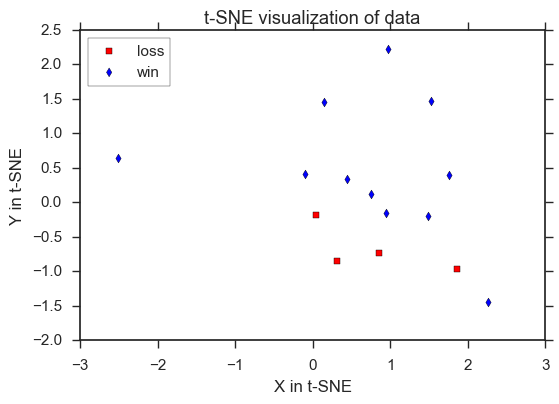

In [390]:
# Scatter Plot
plt.figure()

# Create color map and markers for the 2 Outcomes
markers=('s', 'd')
color_map = {0:'red', 1:'blue'}

# Fill Scatter Plot
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x_1d[y==cl,0], y=x_1d[y==cl,1], c=color_map[idx], marker=markers[idx], 
                label=column_encoders['attacker_outcome'].inverse_transform(cl))

# Labels and legend
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left', frameon=True)
plt.title('t-SNE visualization of data')
plt.show()

## Conclusion

With this format it is easy to see that battles with the same outcome have the similar parameters, although our sample size is small and we did not use dummy variables. Confidence-level is low.